In [1]:
# Load video from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download the dataset

In [2]:
!pip install gdown -U --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [3]:
#get the data (picture and annotation)
import gdown
!gdown 13Xvx-fZJb55vvT9tGaAa6ijE6fHgYIkl

Downloading...
From (uriginal): https://drive.google.com/uc?id=13Xvx-fZJb55vvT9tGaAa6ijE6fHgYIkl
From (redirected): https://drive.google.com/uc?id=13Xvx-fZJb55vvT9tGaAa6ijE6fHgYIkl&confirm=t&uuid=38d81549-5f0c-4ba3-a97e-4a5b02f100f7
To: /content/data.zip
100% 1.82G/1.82G [00:12<00:00, 150MB/s]


In [4]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/13_6.txt           
  inflating: __MACOSX/data/._13_6.txt  
  inflating: data/35_5.txt           
  inflating: __MACOSX/data/._35_5.txt  
  inflating: data/70_5.txt           
  inflating: __MACOSX/data/._70_5.txt  
  inflating: data/10_6.jpg           
  inflating: __MACOSX/data/._10_6.jpg  
  inflating: data/36_5.jpg           
  inflating: __MACOSX/data/._36_5.jpg  
  inflating: data/73_5.jpg           
  inflating: __MACOSX/data/._73_5.jpg  
  inflating: data/54_4.txt           
  inflating: __MACOSX/data/._54_4.txt  
  inflating: data/0000001.jpg        
  inflating: __MACOSX/data/._0000001.jpg  
  inflating: data/1452_3.jpg         
  inflating: __MACOSX/data/._1452_3.jpg  
  inflating: data/105_4.jpg          
  inflating: __MACOSX/data/._105_4.jpg  
  inflating: data/0000015.jpg        
  inflating: __MACOSX/data/._0000015.jpg  
  inflating: data/140_4.jpg          
  inflating: __MACO

In [5]:
#get the video
!gdown 1JXsAxKjfTeBNvYRCV9ew1mAMccNklH4s

Downloading...
From: https://drive.google.com/uc?id=1JXsAxKjfTeBNvYRCV9ew1mAMccNklH4s
To: /content/VID-20230217-WA0000.mp4
100% 5.17M/5.17M [00:00<00:00, 51.4MB/s]


In [ ]:
#get the video
!gdown 1aTakQODMaBJfxXp3F7XDGQ2SIUaGwve9

Downloading...
From: https://drive.google.com/uc?id=1aTakQODMaBJfxXp3F7XDGQ2SIUaGwve9
To: /content/IMG_7076.MOV
100% 99.0M/99.0M [00:03<00:00, 26.5MB/s]


In [ ]:
'''the video per scenario'''
#!gdown 1NNxpkb3zjhqy7KJtaAvAMWswJTTvwvGh #bus stop with traffic jam
#!gdown 1NP6MBsrl9Vybk6BuWr1IDr_GTNCJperL #bus normal speed
#!gdown 1N_7LUgtFq3PrutjwclCis_gXv9Us4x83 #stop zebra crossing with traffic jam
#!gdown 1NSGvr-0LMz4swYVlRQfioLkpVHzynUHB #stop zebra crossing
#!gdown 1NtqR48IsBiFDi3N3V7YO2peXEtnIRRVN #test

## Create File directory and Split the dataset into train and test(val)

In [6]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

# Create folder in colab
train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images
    

    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)

    
    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')
        
    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")
    
    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')
            
        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")
    
        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")

    # copying images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")
    
    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
train_test_split('/content/data/') # change to your dataset folder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
------ PROCESS STARTED -------
--- This folder has a total number of 569 images---


  0%|          | 0/456 [00:00<?, ?it/s]

------ Training data created with 80% split 456 images -------


  0%|          | 0/113 [00:00<?, ?it/s]

------ Testing data created with a total of 113 images ----------
------ TASK COMPLETED -------


##Clone Github Directory

In [14]:
!git clone https://github.com/kanyakornju/speed-prediction.git
%cd /content/speed-prediction/object-detection
!pip install -r requirements.txt

/content/speed-prediction/object-detection


## Object detection YOLOv5

In [8]:
!python setup.py

Checking setup...
YOLOv5 🚀 2023-5-4 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.6/166.8 GB disk)


### You can change epochs as you want but make sure the model is not over fitting.

data: our dataset, cfg: pre-trained model (we've use yolov5s)

In [9]:
!python train.py --epochs 50 --data dataset.yaml --cfg yolov5s.yaml 

2023-05-04 17:21:01.287007: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 17:21:02.368647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox

for source, you can change it to your video directory.

In [18]:
!python detect.py --save-txt --weights runs/train/exp/weights/best.pt --conf 0.6 --source '/content/VID-20230217-WA0000.mp4'

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/VID-20230217-WA0000.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2023-5-4 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/738) /content/VID-20230217-WA0000.mp4: 384x640 6 cars, Done. (0.064s)
video 1/1 (2/738) /content/VID-20230217-WA0000.mp4: 384x640 6 cars, Done. (0.008s)
video 1/1 (3/738) /content/VID-20230217-WA0000.mp4: 384x640 6 cars, Done. (0.011s)
video 1/1 (4/738) /content/VID-20230217-WA0000.mp4: 384x640 6 cars, Done. (0.009s)
video 1/1 (5/738) /conte

#Distance Estimation

In [19]:
%cd /content/speed-prediction/distance-estimation
!pip install -r requirements.txt

/content/speed-prediction/distance-estimation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Get KITTI dataset (don't have to do this because I have put the CSV dataset for this project in GITHUB (annotations.csv)



reminder :  if we run code below, it will takes a lot of time so I have put the file from this process in my github.

In [ ]:
"Do this if you want to get KITTI dataset"
#!bash scripts/download-kitti-dataset.sh

In [ ]:
"Do this if you want to get KITTI dataset"
#!bash scripts/organize-dataset-format.sh

In [ ]:
"Do this if you want to get KITTI dataset to CSV file"
#!python generate-csv.py --input=kitti-dataset/train_annots/ --filename=annotations.csv --results .

Generate train-test dataset for distance estimation from annotations.csv (KITTI dataset)

In [12]:
'''
Generate train-test dataset for distance estimation
'''
import pandas as pd
from tqdm import tqdm
import os
import numpy as np

df = pd.read_csv('annotations.csv')
df = df.dropna()
new_df = df.loc[df['class'] != 'DontCare']
result_df = pd.DataFrame(columns=['filename', 'class', 'xmin', 'ymin', 'xmax', 'ymax', \
                           'angle', 'xloc', 'yloc', 'zloc'])

pbar = tqdm(total=new_df.shape[0], position=1)

for idx, row in new_df.iterrows():
    pbar.update(1)
    result_df.at[idx, 'filename'] = row['filename']
    result_df.at[idx, 'class'] = row['class']

    result_df.at[idx, 'xmin'] = int(row['xmin'])
    result_df.at[idx, 'ymin'] = int(row['ymin'])
    result_df.at[idx, 'xmax'] = int(row['xmax'])
    result_df.at[idx, 'ymax'] = int(row['ymax'])

    result_df.at[idx, 'angle'] = row['observation angle']
    result_df.at[idx, 'xloc'] = int(row['xloc'])
    result_df.at[idx, 'yloc'] = int(row['yloc'])
    result_df.at[idx, 'zloc'] = int(row['zloc'])

mask = np.random.rand(len(result_df)) < 0.9
train = result_df[mask]
test = result_df[~mask]

train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)


100%|█████████▉| 40548/40570 [01:47<00:00, 255.91it/s]

train your own model (adjust your model architecture in train.py)

In [20]:
!python train.py --results models/ --train train.csv --test test.csv

2023-05-04 18:53:36.420650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 18:53:37.681443: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-04 18:53:39.446771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 18:53:39.480105: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

change model (.json) and weights (.h5) to your model name from "/distance-estimation/models/" folder

In [ ]:
'''if you want to continue the train model'''
#!python training_continuer.py --model /content/vehicle-distance-estimation/distance-estimator/models/model@1681254624.json --weights /content/vehicle-distance-estimation/distance-estimator/models/model@1681254624.h5

In [22]:
!python plot_history.py --filename models/model@1682174488_results.csv

Figure(640x480)


In [21]:
!python inference.py --data /content/speed-prediction/object-detection/results/data/data.csv --model models/model@1682174488.json --weights models/model@1682174488.h5 --results /content/speed-prediction/distance-estimation

2023-05-04 19:01:46.874946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 19:01:47.753712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-04 19:01:49.255902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 19:01:49.290755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

For visualize the distance in the video

In [23]:
!python visualizer.py --data /content/speed-prediction/distance-estimation/predictions.csv --frames /content/speed-prediction/object-detection/results/frames -fps 30 --results /content/speed-prediction/distance-estimation

reminder: if the video is too big it cannot visualize, you can use the code below to zip your image and use python code to create the video. If you just want to see the result in your image go to '/content/vehicle-distance-estimation/object-detector/results/frames' folder in your colab

In [ ]:
#!zip -r /content/frames.zip /content/speed-prediction/object-detection/results/frames

#Speed Estimation

modify the code from https://github.com/laavanyebahl/speed-estimation-of-car-with-optical-flow

In [24]:
%cd /content/speed-prediction/speed-estimation

/content/speed-prediction/speed-estimation


In [25]:
!gdown 1ZqjwCGR3as00ut_EZkyO5U0kZ5WcSLaW
!unzip data.zip

Downloading...
From (uriginal): https://drive.google.com/uc?id=1ZqjwCGR3as00ut_EZkyO5U0kZ5WcSLaW
From (redirected): https://drive.google.com/uc?id=1ZqjwCGR3as00ut_EZkyO5U0kZ5WcSLaW&confirm=t&uuid=7f3a6cad-9ccb-499e-984c-6d9b84ab2824
To: /content/speed-prediction/speed-estimation/data.zip
100% 195M/195M [00:01<00:00, 139MB/s]
Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/train.txt          
  inflating: __MACOSX/data/._train.txt  
  inflating: data/.gitattributes     
  inflating: data/flow_train.mp4     
  inflating: __MACOSX/data/._flow_train.mp4  
  inflating: data/train.mp4          
  inflating: __MACOSX/data/._train.mp4  


In [26]:
!python opticalflow.py --test /content/VID-20230217-WA0000.mp4

Converting video to optical flow for:  ./data/train.mp4
 Conversion completed !
 Time Taken: 2506.0681834220886 seconds
Converting video to optical flow for:  /content/VID-20230217-WA0000.mp4
 Conversion completed !
 Time Taken: 119.7865138053894 seconds


In [27]:
!python train.py

2023-05-04 19:48:08.486830: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 19:48:09.474322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Total Images: 20396
Train samples: 16316
Validation samples: 4080
Training model...
2023-05-04 19:48:12.313953: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 19:48:12.359219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from 

In [28]:
!python test.py --test /content/VID-20230217-WA0000.mp4

2023-05-04 21:42:17.513949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 21:42:19.691636: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-04 21:42:23.808935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 21:42:23.893230: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [29]:
import csv
import pandas as pd

# Open the input file and read the contents
with open('/content/speed-prediction/speed-estimation/data/test.txt', 'r') as file:
    contents = file.read().splitlines()

# Create a list of tuples where the first element is the frame number and the second is the speed value
data = [(i+1, float(speed)) for i, speed in enumerate(contents)]

# Open the output file and create a CSV writer object
with open('speed.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['frame', 'Speed'])

    # Write each row of data to the file
    for row in data:
        writer.writerow(row)

# merged two dataframe
df1 = pd.read_csv('/content/speed-prediction/distance-estimation/predictions.csv') # replace with your own dataset filename
df2 = pd.read_csv('speed.csv') # replace with your own dataset filename

merged_df = pd.merge(df1, df2, on='frame')
merged_df.to_csv('/content/speed_test.csv', index=False)

#Speed Prediction

In [30]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
df = pd.read_csv('/content/speed_test.csv')
df.head()

,frame,label,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,Speed
0,1,car,153,373,206,422,224.087264,291.40625,301.712264,329.68750,3.797445,-1.055375
1,1,car,459,373,492,395,672.261792,291.40625,720.594340,308.59375,9.063848,-1.055375
2,1,car,1,375,53,412,1.464623,292.96875,77.625000,321.87500,6.141470,-1.055375
3,1,car,511,379,554,407,748.422170,296.09375,811.400943,317.96875,5.804339,-1.055375
4,1,car,62,372,170,441,90.806604,290.62500,248.985849,344.53125,1.875478,-1.055375


In [43]:
df.isnull().sum()

frame          0
label          0
xmin           0
ymin           0
xmax           0
ymax           0
scaled_xmin    0
scaled_ymin    0
scaled_xmax    0
scaled_ymax    0
distance       0
Speed          0
dtype: int64

In [44]:
df['label'] = df['label'].replace(['car','zebra crossing','human','bus stop'], [0,1,2,3])
df.head()

,frame,label,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,Speed
0,1,0,153,373,206,422,224.087264,291.40625,301.712264,329.68750,3.797445,-1.055375
1,1,0,459,373,492,395,672.261792,291.40625,720.594340,308.59375,9.063848,-1.055375
2,1,0,1,375,53,412,1.464623,292.96875,77.625000,321.87500,6.141470,-1.055375
3,1,0,511,379,554,407,748.422170,296.09375,811.400943,317.96875,5.804339,-1.055375
4,1,0,62,372,170,441,90.806604,290.62500,248.985849,344.53125,1.875478,-1.055375


In [45]:
df['label'] = df['label'].map({0:'car', 1:'zebra crossing', 2:'human', 3:'bus stop'})
df = pd.get_dummies(df, columns = ['label'], prefix=' ',prefix_sep=' ')
df.insert (13, "bus stop", 0)
df = df.drop('frame', axis =1)
df.head()

,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,Speed,car,human,bus stop,zebra crossing
0,153,373,206,422,224.087264,291.40625,301.712264,329.68750,3.797445,-1.055375,1,0,0,0
1,459,373,492,395,672.261792,291.40625,720.594340,308.59375,9.063848,-1.055375,1,0,0,0
2,1,375,53,412,1.464623,292.96875,77.625000,321.87500,6.141470,-1.055375,1,0,0,0
3,511,379,554,407,748.422170,296.09375,811.400943,317.96875,5.804339,-1.055375,1,0,0,0
4,62,372,170,441,90.806604,290.62500,248.985849,344.53125,1.875478,-1.055375,1,0,0,0


In [46]:
train_df = df.sample(frac=0.8, random_state = 0)
test_df = df.drop(train_df.index)

In [47]:
train_df.shape

(3372, 14)

In [48]:
test_df.shape

(843, 14)

In [49]:
train_features = train_df.copy()
test_features = test_df.copy()
x_train, y_train = train_df.drop('Speed', axis=1), train_df['Speed']
x_test, y_test = test_df.drop('Speed', axis=1), test_df['Speed']

In [50]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  minmax_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      minmax_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      minmax_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)


# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(64, input_shape = [13], kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, kernel_initializer='normal',  kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model


# build the model
model = build_model_using_sequential()

In [51]:
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.0005), 
    metrics=[msle]
)

# Hyperparameter tuning ranges
epochs_range = range(100, 1001, 100)
batch_sizes_range = [32, 64, 128, 256, 512]

# Perform hyperparameter tuning
for epochs in epochs_range:
    for batch_size in batch_sizes_range:
        print(f"Training model with epochs={epochs}, batch_size={batch_size}")
        
        # Train the model with the current hyperparameters
        history = model.fit(
            x_train_scaled.values, 
            y_train.values, 
            epochs=epochs, 
            batch_size=batch_size,
            validation_split=0.2,
            verbose=0
        )

        # Print the loss and metrics for the last epoch
        print(f"Final Loss: {history.history['loss'][-1]}")
        print(f"Final Mean Squared Logarithmic Error: {history.history['mean_squared_logarithmic_error'][-1]}")
        print()

Training model with epochs=100, batch_size=32
Final Loss: 0.49051880836486816
Final Mean Squared Logarithmic Error: 0.4784124791622162

Training model with epochs=100, batch_size=64
Final Loss: 0.43335914611816406
Final Mean Squared Logarithmic Error: 0.42360103130340576

Training model with epochs=100, batch_size=128
Final Loss: 0.40739428997039795
Final Mean Squared Logarithmic Error: 0.40243056416511536

Training model with epochs=100, batch_size=256
Final Loss: 0.3955621123313904
Final Mean Squared Logarithmic Error: 0.38701343536376953

Training model with epochs=100, batch_size=512
Final Loss: 0.3726046085357666
Final Mean Squared Logarithmic Error: 0.36907196044921875

Training model with epochs=200, batch_size=32
Final Loss: 0.44908255338668823
Final Mean Squared Logarithmic Error: 0.4418001174926758

Training model with epochs=200, batch_size=64
Final Loss: 0.44051650166511536
Final Mean Squared Logarithmic Error: 0.43011802434921265

Training model with epochs=200, batch_size

In [53]:
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=1000, 
    batch_size=256,
    validation_split=0.2
)

Epoch 1/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.3523 - mean_squared_logarithmic_error: 0.3482 - val_loss: 0.3210 - val_mean_squared_logarithmic_error: 0.3112
Epoch 2/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.3611 - mean_squared_logarithmic_error: 0.3554 - val_loss: 0.3266 - val_mean_squared_logarithmic_error: 0.3168
Epoch 3/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.3460 - mean_squared_logarithmic_error: 0.3424 - val_loss: 0.3239 - val_mean_squared_logarithmic_error: 0.3134
Epoch 4/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.3540 - mean_squared_logarithmic_error: 0.3525 - val_loss: 0.3106 - val_mean_squared_logarithmic_error: 0.2995
Epoch 5/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.3437 - mean_squared_logarithmic_error: 0.3415 - val_loss: 0.3125 - val_mean_squared_logarithmic_error: 0.3023
Epoch 6/1000
11/11 [==============================] - 0s 10ms/ste

In [52]:
msle_score = model.evaluate(x_train_scaled, y_train, verbose=0)
print("MSLE score:", msle_score)

MSLE score: [0.30592474341392517, 0.3012174069881439]


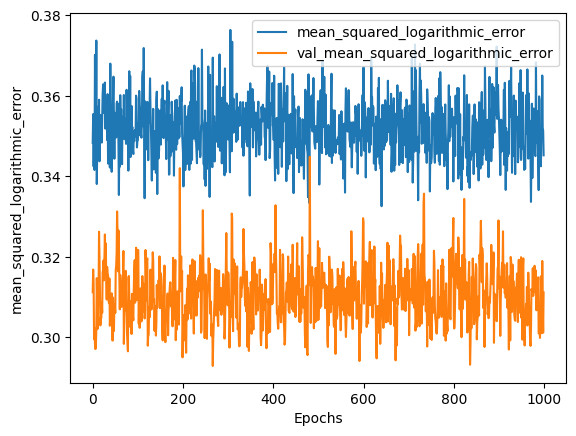

In [54]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [55]:
x_test['prediction'] = model.predict(x_test_scaled)
x_test

27/27 [==============================] - 0s 2ms/step


,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,car,human,bus stop,zebra crossing,prediction
0,153,373,206,422,224.087264,291.40625,301.712264,329.68750,3.797445,1,0,0,0,-0.023053
3,511,379,554,407,748.422170,296.09375,811.400943,317.96875,5.804339,1,0,0,0,-0.023053
7,461,373,497,395,675.191038,291.40625,727.917453,308.59375,9.141474,1,0,0,0,0.658091
12,145,371,203,419,212.370283,289.84375,297.318396,327.34375,4.321876,1,0,0,0,-0.023053
21,46,369,157,445,67.372642,288.28125,229.945755,347.65625,1.365552,1,0,0,0,-0.023053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,414,302,440,320,606.353774,235.93750,644.433962,250.00000,82.968597,1,0,0,0,3.802454
4190,1,240,223,423,1.464623,187.50000,326.610849,330.46875,5.085478,1,0,0,0,5.188375
4196,416,296,439,317,609.283019,231.25000,642.969340,247.65625,78.102066,1,0,0,0,3.641000
4197,499,301,525,320,730.846698,235.15625,768.926887,250.00000,92.508545,1,0,0,0,3.905477


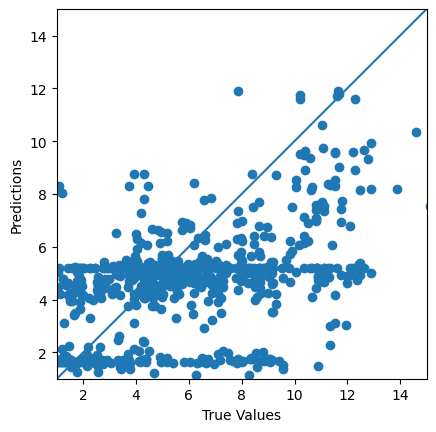

In [56]:
predictions = x_test['prediction']
test = test_features['Speed']
a = plt.axes(aspect='equal')
plt.scatter(test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [1, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

finish!

# Acknowledgement
the code from this project modified from:

[KITTI Distance estimation](https://github.com/harshilpatel312/KITTI-distance-estimation)

[Vehicle Distance Estimation](https://github.com/RmdanJr/vehicle-distance-estimation)

[Speed Estimation of car with Optical Flow](https://github.com/laavanyebahl/speed-estimation-of-car-with-optical-flow)

more scoring: https://scikit-learn.org/stable/modules/model_evaluation.html